In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
train = pd.read_csv("C:/Users/gokay/OneDrive/Masaüstü/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5/2) Convolutional Neural Network/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test = pd.read_csv("C:/Users/gokay/OneDrive/Masaüstü/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5/2) Convolutional Neural Network/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)
# labellarım Ytrain oluyor geriye kalan pixellerde xtrain



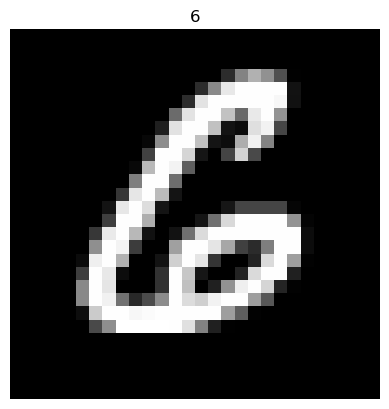

In [27]:
img = X_train.iloc[767].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap="gray")
plt.title(train.iloc[767,0]) # 767. satırındaki 0. sütunu alır yani label
plt.axis("off")
plt.show()

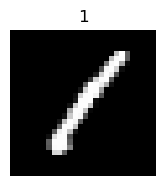

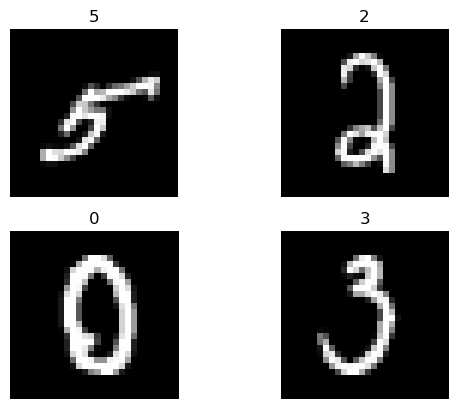

In [28]:
plt.subplot(2,3,1)
img = X_train.iloc[0].to_numpy().reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()


plt.subplot(2,2,1)
img1 = X_train.iloc[571].to_numpy().reshape(28,28)
plt.imshow(img1,cmap="gray")
plt.title(train.iloc[571,0])
plt.axis("off")

plt.subplot(2,2,2)
img2=X_train.iloc[572].to_numpy().reshape(28,28)
plt.imshow(img2,cmap="gray")
plt.title(train.iloc[572,0])
plt.axis("off")

plt.subplot(2,2,3)
img3=X_train.iloc[1881].to_numpy().reshape(28,28)
plt.imshow(img3,cmap="gray")
plt.title(train.iloc[1881,0])
plt.axis("off")

plt.subplot(2,2,4)
img4=X_train.iloc[2025].to_numpy().reshape(28,28)
plt.imshow(img4,cmap="gray")
plt.title(train.iloc[2025,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalizasyon, Yeniden Şekillendirme ve Etiket Kodlama
* Normalizasyon
    * Aydınlatmadaki farklılıkların etkisini azaltmak için gri tonlama normalizasyonu yapıyoruz.
    * Normalizasyon yaparsak, CNN daha hızlı çalışır.
* Yeniden Şekillendirme
    * Eğitim ve test görüntüleri (28 x 28)
    * Tüm verileri 28x28x1 3D matrislerine yeniden şekillendiriyoruz.
    * Keras 28x28x1 şeklinde çalışıyor , 1 anlamı grayscale , eğer 28x28 dersek keras bunu anlamaz 
    * Keras, kanallara karşılık gelen son bir boyuta ihtiyaç duyar. Görüntülerimiz gri tonlamalı olduğu için sadece bir kanal kullanılır.
* Etiket Kodlama  
    * Etiketleri one hot vektörlerine kodlayın
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]


In [29]:
X_train = X_train / 255.0
test = test / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [30]:
# Gri tonlu veriyi 3 kanallı RGB'ye dönüştürme
# ResNet modeli  RGB (3 kanallı) görüntülerle çalışacak şekilde tasarlanmıştır.
X_train = X_train.values.reshape(-1, 28, 28, 1)  # (28,28,1)
X_train = np.stack((X_train.squeeze(),) * 3, axis=-1)  # (28,28,3)
test = test.values.reshape(-1, 28, 28, 1)
test = np.stack((test.squeeze(),) * 3, axis=-1) 



X_train.squeeze()
squeeze() fonksiyonu, veri setindeki gereksiz boyutları (yani, 1 olan boyutları) kaldırır. Eğer X_train veri seti (N, 28, 28, 1) boyutlarında ise, squeeze() fonksiyonu bu 1 olan boyutu kaldırarak X_train'i (N, 28, 28) boyutlarına dönüştürür.
np.stack((X_train.squeeze(),) * 3, axis=-1)
Bu satırda X_train.squeeze() fonksiyonu ile elde edilen her bir 28x28 boyutundaki gri tonlu (single-channel) görseli üç defa kopyalar.

(X_train.squeeze(),) * 3 ifadesi, X_train.squeeze() görüntüsünü üç kez tekrar eder. Yani, üç tane 28x28'lik görsel elde edilir.

np.stack(..., axis=-1) ise bu üç kopyayı son boyutta (kanal boyutu) birleştirir. Bu işlem sonucunda, her bir görsel (28, 28, 3) boyutunda olacak şekilde, üç kanal (R, G, B) içerir.

In [31]:
# X_train için manuel yeniden boyutlandırma
import cv2
X_train = np.array([cv2.resize(img, (32, 32)) for img in X_train])

In [32]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=10)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,random_state=2,test_size=0.1)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 32, 32, 3)
x_test shape (4200, 32, 32, 3)
y_train shape (37800, 10)
y_test shape (4200, 10)


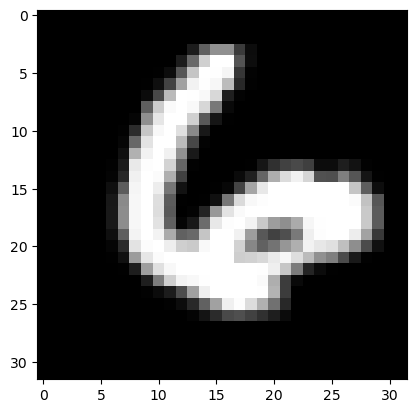

In [34]:
# Bazı örnekler
plt.imshow(X_train[2232][:,:,0],cmap='gray')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications import ResNet50
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential , Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization

# ResNet modeli girdiyi 32x32 veya daha üstü bekler
resnet_base = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))

# Modelin üzerine kendi sınıflandırma katmanlarımızı ekliyoruz
x = resnet_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [36]:
resnet_model = Model(inputs=resnet_base.input, outputs=output)


In [37]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [38]:
epochs = 10  # Sonuçların daha iyi olması için epoch sayısını artırın
batch_size = 250

In [39]:

#Model Summary
print(resnet_model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [40]:
# VERİ ARTTIRMA
# Veri artırma işlemi
datagen = ImageDataGenerator(
        featurewise_center=False,  # veri seti üzerinde giriş ortalamasını 0'a ayarla
        samplewise_center=False,  # her örneğin ortalamasını 0'a ayarla
        featurewise_std_normalization=False,  # veri setinin std ile girişleri böl
        samplewise_std_normalization=False,  # her bir girişi kendi std ile böl
        zca_whitening=False,  # boyut azaltma işlemi
        rotation_range=5,  # görüntüleri rastgele 5 derece döndür
        zoom_range = 0.1, # rastgele görüntüleri %5 zoomla
        width_shift_range=0.1,  # görüntüleri yatayda rastgele %5 kaydır
        height_shift_range=0.1,  # görüntüleri dikeyde rastgele %5 kaydır
        horizontal_flip=False,  # görüntüleri yatayda rastgele çevir
        vertical_flip=False)  # görüntüleri dikeyde rastgele çevirme

datagen.fit(X_train)


In [41]:

history = resnet_model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                           epochs=epochs, 
                           validation_data=(X_val, Y_val),
                           steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/10
151/151 [==============================] - 277s 2s/step - loss: 0.7664 - accuracy: 0.7797 - val_loss: 2.4239 - val_accuracy: 0.1098
Epoch 2/10
151/151 [==============================] - 272s 2s/step - loss: 0.1499 - accuracy: 0.9544 - val_loss: 2.3571 - val_accuracy: 0.3157
Epoch 3/10
151/151 [==============================] - 273s 2s/step - loss: 0.1011 - accuracy: 0.9687 - val_loss: 0.1428 - val_accuracy: 0.9552
Epoch 4/10
151/151 [==============================] - 269s 2s/step - loss: 0.0801 - accuracy: 0.9749 - val_loss: 0.0728 - val_accuracy: 0.9790
Epoch 5/10
151/151 [==============================] - 269s 2s/step - loss: 0.0698 - accuracy: 0.9786 - val_loss: 0.0698 - val_accuracy: 0.9802
Epoch 6/10
151/151 [==============================] - 271s 2s/step - loss: 0.0629 - accuracy: 0.9814 - val_loss: 0.1281 - val_accuracy: 0.9695
Epoch 7/10
151/151 [==============================] - 270s 2s/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0590 - val_accuracy: 0.9824

In [42]:
score = resnet_model.evaluate(X_val,Y_val,verbose = 0)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])



Test Loss :  0.07251029461622238
Test Accuracy :  0.9769047498703003


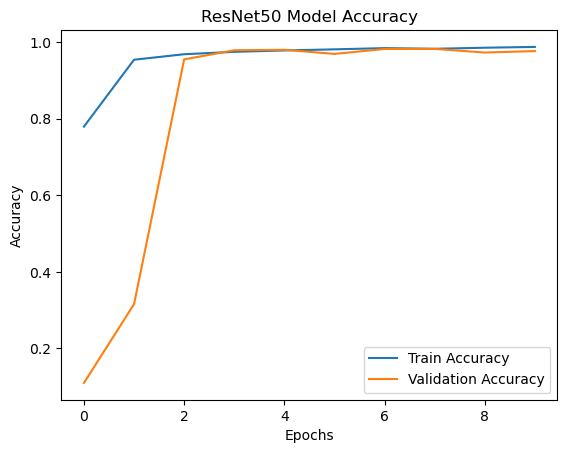

In [43]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

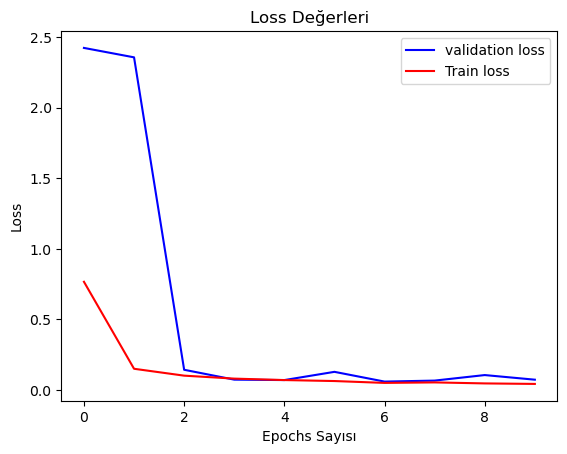

In [44]:
plt.plot(history.history["val_loss"],color="b",label="validation loss")
plt.plot(history.history["loss"],color="r",label="Train loss")
plt.title("Loss Değerleri")
plt.xlabel("Epochs Sayısı")
plt.ylabel("Loss")
plt.legend()
plt.show()

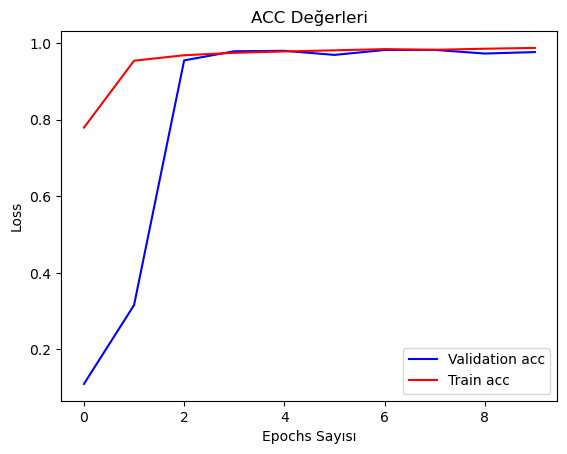

In [45]:
plt.plot(history.history["val_accuracy"],color="b",label="Validation acc")
plt.plot(history.history["accuracy"],color="r",label="Train acc")
plt.title("ACC Değerleri")
plt.xlabel("Epochs Sayısı")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 44ms/step
Tahmin Edilen Sınıf: 7


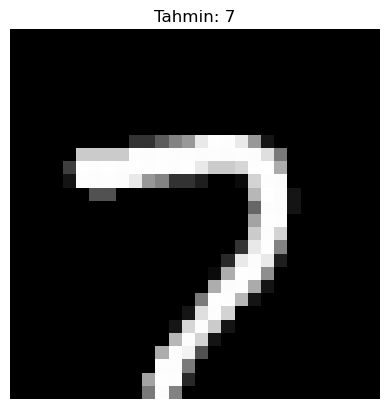

In [50]:
import random

# Test verisetiyle tahmin
index = random.randint(0, test.shape[0] - 1)  # Tahmin yapmak istediğiniz  rastgele bir indeks
sample_image = test[index]  # Test setinden bir örnk

#  Modelle tahmin yapın
sample_image_reshaped = cv2.resize(sample_image, (32, 32))  # Eğer boyutlandırma gerekiyorsa
sample_image_reshaped = np.expand_dims(sample_image_reshaped, axis=0)  # Batch formatı
tahmin = resnet_model.predict(sample_image_reshaped)
sınıf_tahmin = np.argmax(tahmin)  # En yüksek olasılığa sahip sınıfı alma

#  Tahmini yazdırın
print(f"Tahmin Edilen Sınıf: {sınıf_tahmin}")

#  Görüntüyü görselleştirin
plt.imshow(sample_image[:, :, 0], cmap="gray")  # Görüntüyü 28x28 formatında gösterme
plt.title(f"Tahmin: {sınıf_tahmin}")
plt.axis("off")
plt.show()


1/1 [==============================] - 0s 43ms/step
Tahmin Edilen Sınıf: 2
Gerçek Sınıf: 2


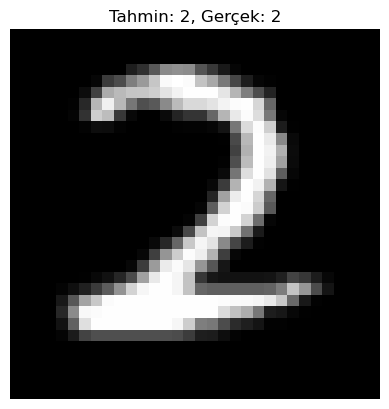

In [52]:
#  X_val'dan örnek ile tahmin edelim
import random
index = random.randint(0, X_val.shape[0] - 1) 
sample_image = X_val[index]  # X_val içindeki bir örnek


sample_image_reshaped = cv2.resize(sample_image, (32, 32))  # Eğer boyutlandırma gerekiyorsa
sample_image_reshaped = np.expand_dims(sample_image_reshaped, axis=0)  # Batch formatı

prediction = resnet_model.predict(sample_image_reshaped)
predicted_class = np.argmax(prediction)  # En yüksek olasılığa sahip sınıfı alma

#  Orijinal etiketle karşılaştıma
true_label = np.argmax(Y_val[index])  # Y_val içindeki  etiket

#  Sonuçları yazdırın
print(f"Tahmin Edilen Sınıf: {predicted_class}")
print(f"Gerçek Sınıf: {true_label}")

#  Görüntüyü görselleştirin
plt.imshow(sample_image[:, :, 0], cmap="gray")  
plt.title(f"Tahmin: {predicted_class}, Gerçek: {true_label}")
plt.axis("off")
plt.show()


132/132 [==============================] - 6s 45ms/step


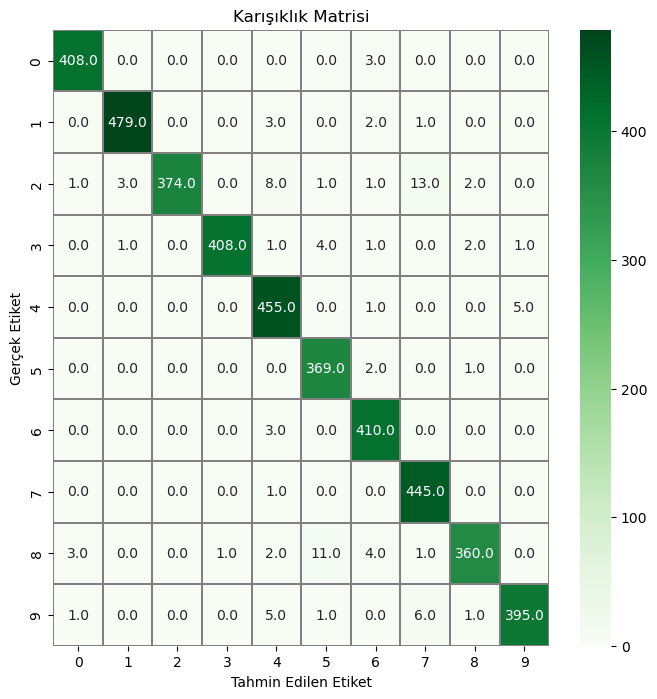

In [54]:
# Karışıklık matrisi (Confusion Matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Doğrulama veri setinden değerleri tahmin et
Y_pred = resnet_model.predict(X_val)

# Tahmin sınıflarını one hot vektörlerine dönüştür
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Doğrulama gözlemlerini one hot vektörlerine dönüştür
Y_true = np.argmax(Y_val, axis=1)

# Karışıklık matrisini hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Karışıklık matrisini çiz
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.title("Karışıklık Matrisi")
plt.show()


## 1. Sigmoid
Sigmoid fonksiyonu, çıkış değeri olarak 0 ile 1 arasında bir değer üretir.
Avantajları:

Çıktıları, sınıflandırma görevlerinde olasılık olarak yorumlanabilir.
İyi bir sınıflandırma sınırı sağlar.
Dezavantajları:

Vanishing Gradient (Kaybolan Gradyan): Sigmoid, özellikle çok derin ağlarda, gradyanların çok küçük olmasına neden olabilir. Bu da öğrenme sürecini zorlaştırır.
Çıktı değeri çok küçük (0'a yakın) olduğunda, ağın öğrenmesi çok yavaşlar.

Ne zaman kullanılır:

Binary sınıflandırma problemlerinde (örneğin, evet/hayır, 0/1) çıkış katmanında kullanılır.

## 2. Tanh (Hiperbolik Tangent)
Tanh fonksiyonu, çıkış değeri olarak -1 ile 1 arasında bir değer üretir.

Özellikler:

Çıktısı -1 ile 1 arasında sınırlıdır.
Çoğunlukla sıfır merkezli olduğu için, ağın öğrenmesi daha verimli olabilir.
Sigmoid'e benzer ancak daha geniş bir aralıkta çalışır.
Avantajları:

Sıfır merkezli olması, öğrenme sürecinde daha hızlı bir hız sağlar (negatif girişler daha hızlı öğrenilebilir).
Aktivasyonlar daha geniş bir aralığa sahiptir, bu da ağın daha güçlü bir temsil gücü sağlar.
Dezavantajları:

Vanishing Gradient: Sigmoid gibi, Tanh fonksiyonu da çok küçük gradyanlar üretebilir, bu da özellikle derin ağlarda öğrenmenin zorlaşmasına neden olabilir.
Çıkışın 1 veya -1’e çok yakın olması, ağın öğrenmesini yavaşlatabilir.
Ne zaman kullanılır:

Gizli katmanlarda genellikle kullanılır, çünkü sıfır merkezli olması öğrenme sürecini iyileştirir.


## 3. ReLU (Rectified Linear Unit)
ReLU, günümüzde en popüler aktivasyon fonksiyonlarından biridir.

Özellikler:

Pozitif girişler için doğrusal, negatif girişler için sıfır olan bir fonksiyondur.
Çok basit ve hesaplama açısından verimlidir.
Avantajları:

Vanishing Gradient Sorununa karşı daha dayanıklıdır, çünkü negatif değerler dışında gradyanlar kaybolmaz.
Hesaplama açısından hızlıdır ve eğitimde daha verimli sonuçlar verir.
Derin ağlarda oldukça iyi performans gösterir.
Dezavantajları:

Dead Neurons (Ölü Nöronlar): ReLU, negatif değerler için sıfır döndürdüğü için, bazı nöronlar "ölü" hale gelebilir ve ağırlıkları güncellenmeyebilir. Bu, özellikle yüksek öğrenme oranları kullanıldığında meydana gelebilir.
Ne zaman kullanılır:

Gizli katmanlarda genellikle ReLU kullanılır, özellikle derin ağlar için.
Bu, öğrenme sürecini hızlandıran ve performansı artıran bir fonksiyondur.


## 4. Leaky ReLU
Leaky ReLU, ReLU’nun modifiye edilmiş bir versiyonudur.

Özellikler:

Negatif değerler için küçük bir eğim sağlar (
𝛼
α negatif bölgeyi yumuşatır).
Bu, ReLU’nun ölü nöron sorununu çözmeye yardımcı olabilir.
Avantajları:

ReLU'nun ölü nöron problemini çözer.
Eğitimde daha stabil sonuçlar verebilir.
Dezavantajları:

Negatif değerler için küçük eğim hala var, ancak bu durumun tam anlamıyla ReLU kadar etkili olup olmadığı tartışmalıdır.
Ne zaman kullanılır:

Derin ağlarda, ReLU'nun ölü nöron sorunu yaşandığında Leaky ReLU tercih edilebilir.


## 5. Softmax
Softmax, genellikle sınıflandırma problemlerinde kullanılır ve çok sınıflı (multiclass) sınıflandırmalarda tercih edilir. Çıktıları, her sınıfın olasılıklarını verir ve bu olasılıkların toplamı 1 olur.

Özellikler:

Çoklu sınıflar için olasılıkları normalize eder.
Çıkışlar arasındaki ilişkiyi yakalayarak her bir sınıfın olasılığını tahmin eder.
Avantajları:

Çok sınıflı sınıflandırma problemleri için uygundur.
Çıktıların olasılık gibi yorumlanabilmesi, sınıflandırma kararlarını netleştirir.
Dezavantajları:

Yalnızca son katmanda kullanılır, çünkü her sınıfın olasılığı gereklidir.
Ne zaman kullanılır:

Çok sınıflı sınıflandırma problemlerinde (örneğin, bir resmin hangi kategoriye ait olduğunu belirlemek) kullanılır.



## Özet
Sigmoid: İkili sınıflandırma için, ancak derin ağlarda kaybolan gradyan sorununa yol açabilir.
Tanh: Sıfır merkezli, ancak yine de kaybolan gradyan sorunu olabilir. Gizli katmanlarda kullanımı yaygındır.
ReLU: Derin ağlar için en popüler seçimdir. Hesaplama açısından hızlıdır ve kaybolan gradyan sorununa karşı dayanıklıdır.
Leaky ReLU: ReLU'nun ölü nöron sorununu aşmak için kullanılır.
Softmax: Çoklu sınıf sınıflandırma problemleri için son katmanda kullanılır.